## # Machine Learning - Principal Component Analysis (PCA)

### Step-01: Import all the libraries to perform Principal Component Analysis (PCA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Step-02: Import load_iris from sklearn.datasets

In [2]:
from sklearn.datasets import load_iris

In [3]:
dataset = load_iris()

In [4]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
x = dataset["data"]
y = dataset["target"]

In [8]:
print("x: \n\n {} \n" .format(x))
print("x.shape: {} \n" .format(x.shape))

x: 

 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 

In [10]:
print("y: \n\n {} \n" .format(y))
print("y.shape: {} \n" .format(y.shape))

y: 

 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] 

y.shape: (150,) 



### Step-03: Import train_test_split from sklearn.model_selection

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 100)

In [14]:
print("x_train: \n\n {} \n" .format(x_train))
print("x_train.shape: {} \n" .format(x_train.shape))

x_train: 

 [[5.1 3.3 1.7 0.5]
 [5.  3.2 1.2 0.2]
 [6.5 2.8 4.6 1.5]
 [7.9 3.8 6.4 2. ]
 [6.1 3.  4.9 1.8]
 [5.4 3.  4.5 1.5]
 [6.4 2.7 5.3 1.9]
 [5.7 2.9 4.2 1.3]
 [7.7 3.8 6.7 2.2]
 [6.5 3.2 5.1 2. ]
 [5.8 2.7 3.9 1.2]
 [4.6 3.6 1.  0.2]
 [6.9 3.1 5.4 2.1]
 [6.7 3.3 5.7 2.1]
 [6.3 2.8 5.1 1.5]
 [5.5 4.2 1.4 0.2]
 [4.4 3.2 1.3 0.2]
 [5.8 2.7 5.1 1.9]
 [5.4 3.9 1.7 0.4]
 [5.5 3.5 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [6.9 3.1 4.9 1.5]
 [6.5 3.  5.8 2.2]
 [6.7 3.3 5.7 2.5]
 [6.1 2.6 5.6 1.4]
 [5.4 3.7 1.5 0.2]
 [6.  3.4 4.5 1.6]
 [5.9 3.2 4.8 1.8]
 [4.6 3.1 1.5 0.2]
 [6.8 2.8 4.8 1.4]
 [4.9 2.4 3.3 1. ]
 [6.2 2.8 4.8 1.8]
 [5.1 3.5 1.4 0.2]
 [6.  2.9 4.5 1.5]
 [5.6 3.  4.1 1.3]
 [6.  2.7 5.1 1.6]
 [7.  3.2 4.7 1.4]
 [6.2 2.2 4.5 1.5]
 [5.7 3.  4.2 1.2]
 [6.4 2.8 5.6 2.2]
 [5.7 2.5 5.  2. ]
 [4.3 3.  1.1 0.1]
 [6.3 2.5 4.9 1.5]
 [5.1 3.5 1.4 0.3]
 [6.4 2.9 4.3 1.3]
 [7.2 3.  5.8 1.6]
 [6.4 3.1 5.5 1.8]
 [4.9 2.5 4.5 1.7]
 [5.6 2.9 3.6 1.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.9 0.4]
 [4.4 3.  1.3 0.2]


In [15]:
print("x_test: \n\n {} \n" .format(x_test))
print("x_test.shape: {} \n" .format(x_test.shape))

x_test: 

 [[6.4 2.8 5.6 2.1]
 [4.8 3.4 1.6 0.2]
 [7.7 2.6 6.9 2.3]
 [5.7 4.4 1.5 0.4]
 [6.3 2.7 4.9 1.8]
 [7.7 3.  6.1 2.3]
 [5.2 4.1 1.5 0.1]
 [4.9 3.  1.4 0.2]
 [6.5 3.  5.5 1.8]
 [4.8 3.  1.4 0.3]
 [5.  3.5 1.3 0.3]
 [6.4 3.2 5.3 2.3]
 [5.  3.4 1.6 0.4]
 [5.2 3.4 1.4 0.2]
 [6.7 3.  5.2 2.3]
 [6.2 2.9 4.3 1.3]
 [6.  2.2 4.  1. ]
 [6.7 3.  5.  1.7]
 [7.7 2.8 6.7 2. ]
 [6.8 3.  5.5 2.1]
 [7.2 3.2 6.  1.8]
 [5.4 3.4 1.5 0.4]
 [6.3 2.5 5.  1.9]
 [4.7 3.2 1.6 0.2]
 [5.6 2.5 3.9 1.1]
 [5.9 3.  5.1 1.8]
 [6.6 3.  4.4 1.4]
 [5.4 3.4 1.7 0.2]
 [6.1 2.8 4.7 1.2]
 [6.9 3.2 5.7 2.3]
 [5.5 2.4 3.7 1. ]
 [5.7 2.8 4.1 1.3]
 [6.  2.2 5.  1.5]
 [4.8 3.  1.4 0.1]
 [5.4 3.9 1.3 0.4]
 [6.4 3.2 4.5 1.5]
 [5.1 3.8 1.6 0.2]
 [5.5 2.5 4.  1.3]
 [6.3 3.4 5.6 2.4]
 [5.8 2.8 5.1 2.4]
 [4.5 2.3 1.3 0.3]
 [5.5 2.6 4.4 1.2]
 [7.1 3.  5.9 2.1]
 [7.2 3.6 6.1 2.5]
 [4.9 3.6 1.4 0.1]
 [4.6 3.4 1.4 0.3]
 [5.  3.  1.6 0.2]
 [5.1 3.7 1.5 0.4]
 [5.8 2.6 4.  1.2]
 [4.9 3.1 1.5 0.1]] 

x_test.shape: (50, 4) 



In [16]:
print("y_train: \n\n {} \n" .format(y_train))
print("y_train.shape: {} \n" .format(y_train.shape))

y_train: 

 [0 0 1 2 2 1 2 1 2 2 1 0 2 2 2 0 0 2 0 0 0 1 2 2 2 0 1 1 0 1 1 2 0 1 1 1 1
 1 1 2 2 0 1 0 1 2 2 2 1 0 0 0 0 2 0 0 1 0 2 1 2 0 2 2 0 1 1 1 2 1 1 0 0 0
 2 1 1 0 2 2 2 1 1 1 1 2 2 0 0 1 1 1 1 2 1 1 2 1 0 0] 

y_train.shape: (100,) 



In [17]:
print("y_test: \n\n {} \n" .format(y_test))
print("y_test.shape: {} \n" .format(y_test.shape))

y_test: 

 [2 0 2 0 2 2 0 0 2 0 0 2 0 0 2 1 1 1 2 2 2 0 2 0 1 2 1 0 1 2 1 1 2 0 0 1 0
 1 2 2 0 1 2 2 0 0 0 0 1 0] 

y_test.shape: (50,) 



### Step-04 Import PCA from sklearn.decomposition

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components = 3)

In [20]:
pca.fit_transform(x_train)

array([[-2.36203952,  0.11914695,  0.03269436],
       [-2.92591368,  0.10830398, -0.1720003 ],
       [ 1.02849013,  0.1240737 , -0.31909057],
       [ 3.17453467,  1.40047053, -0.00526782],
       [ 1.23279545, -0.11434341,  0.20306876],
       [ 0.53138642, -0.49881566,  0.39024262],
       [ 1.74415137, -0.18938186, -0.07613891],
       [ 0.31846649, -0.27593169,  0.03961729],
       [ 3.43146938,  1.1806595 ,  0.22553085],
       [ 1.60291945,  0.24182028,  0.24253852],
       [ 0.07726273, -0.27399924, -0.22018698],
       [-3.27392851,  0.13191076,  0.29302385],
       [ 2.04796672,  0.39014947,  0.03690257],
       [ 2.21787074,  0.3301558 ,  0.29797962],
       [ 1.38658024, -0.10671546, -0.17742411],
       [-2.65561195,  1.09949731,  0.24584695],
       [-3.05533335, -0.33277378,  0.15302168],
       [ 1.35679813, -0.57661182,  0.22745935],
       [-2.33843207,  0.74786226,  0.22312587],
       [-2.68478346,  0.64530723, -0.22922006],
       [-2.46474718,  0.18901155,  0.263

In [21]:
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [22]:
x_train

array([[-2.36203952,  0.11914695,  0.03269436],
       [-2.92591368,  0.10830398, -0.1720003 ],
       [ 1.02849013,  0.1240737 , -0.31909057],
       [ 3.17453467,  1.40047053, -0.00526782],
       [ 1.23279545, -0.11434341,  0.20306876],
       [ 0.53138642, -0.49881566,  0.39024262],
       [ 1.74415137, -0.18938186, -0.07613891],
       [ 0.31846649, -0.27593169,  0.03961729],
       [ 3.43146938,  1.1806595 ,  0.22553085],
       [ 1.60291945,  0.24182028,  0.24253852],
       [ 0.07726273, -0.27399924, -0.22018698],
       [-3.27392851,  0.13191076,  0.29302385],
       [ 2.04796672,  0.39014947,  0.03690257],
       [ 2.21787074,  0.3301558 ,  0.29797962],
       [ 1.38658024, -0.10671546, -0.17742411],
       [-2.65561195,  1.09949731,  0.24584695],
       [-3.05533335, -0.33277378,  0.15302168],
       [ 1.35679813, -0.57661182,  0.22745935],
       [-2.33843207,  0.74786226,  0.22312587],
       [-2.68478346,  0.64530723, -0.22922006],
       [-2.46474718,  0.18901155,  0.263

In [23]:
x_test

array([[ 2.06477007, -0.20070157,  0.11554605],
       [-2.67003181,  0.03036104,  0.09621799],
       [ 3.73620756,  0.32291904, -0.51063778],
       [-2.44326498,  1.33256743,  0.38413571],
       [ 1.3289402 , -0.17564601, -0.1034311 ],
       [ 3.01592394,  0.73630706, -0.30038157],
       [-2.70461782,  0.81499552,  0.29337468],
       [-2.77362717, -0.13301292, -0.23843077],
       [ 1.89226094,  0.06004667,  0.03399573],
       [-2.7741266 , -0.21599454, -0.13374331],
       [-2.82888124,  0.28023995,  0.0873879 ],
       [ 1.84517606,  0.09801973,  0.46492317],
       [-2.52743231,  0.14648347,  0.09367243],
       [-2.69838917,  0.34834524, -0.12998499],
       [ 1.88312735,  0.19263628,  0.16514848],
       [ 0.58394228,  0.05872612, -0.21814208],
       [ 0.2048154 , -0.46322766, -0.75665337],
       [ 1.49877067,  0.30329602, -0.15937808],
       [ 3.44182098,  0.53109513, -0.54634923],
       [ 2.10616018,  0.23423031,  0.03017739],
       [ 2.55721695,  0.59884721, -0.167

### Step-05: Import LogisticRegression from sklearn.linear_model

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logistic_regression = LogisticRegression()

In [27]:
logistic_regression.fit(x_train, y_train)

LogisticRegression()

In [28]:
y_pred = logistic_regression.predict(x_test)

In [29]:
y_pred

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       0, 0, 0, 0, 1, 0])

### Step-06 Import confusion_matrix, accuracy_score, classification_report from sklearn.metrics

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [32]:
print("Confusion Matrix: \n\n {} \n" .format(confusion_matrix(y_test, y_pred)))
print("Accuracy Score: {} \n" .format(accuracy_score(y_test, y_pred)))
print("Classification Report: \n\n {} \n" .format(classification_report(y_test, y_pred)))

Confusion Matrix: 

 [[20  0  0]
 [ 0 12  0]
 [ 0  1 17]] 

Accuracy Score: 0.98 

Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.92      1.00      0.96        12
           2       1.00      0.94      0.97        18

    accuracy                           0.98        50
   macro avg       0.97      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50
 



### Step-05: Import all the classifiers from sklearn

In [35]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 12.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 10.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [33]:
def evaluate_model(x_train, x_test, y_train, y_test, model, title = "model") :
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Confusion Matrix for {} : \n\n {} \n" .format(title, confusion_matrix(y_test, y_pred)))
    print("Accuracy Score for {} : {} \n" .format(title, accuracy_score(y_test, y_pred)))
    print("Classification Report for {} : \n\n {} \n" .format(title, classification_report(y_test, y_pred)))
    return None

In [38]:
logistic_regression = LogisticRegression()
evaluate_model(x_train, x_test, y_train, y_test, logistic_regression, "Logistic Regression")

Confusion Matrix for Logistic Regression : 

 [[20  0  0]
 [ 0 12  0]
 [ 0  1 17]] 

Accuracy Score for Logistic Regression : 0.98 

Classification Report for Logistic Regression : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.92      1.00      0.96        12
           2       1.00      0.94      0.97        18

    accuracy                           0.98        50
   macro avg       0.97      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50
 



In [39]:
decision_tree_classifier = DecisionTreeClassifier()
evaluate_model(x_train, x_test, y_train, y_test, decision_tree_classifier, "Decision Tree Classifier")

Confusion Matrix for Decision Tree Classifier : 

 [[20  0  0]
 [ 0 11  1]
 [ 0  2 16]] 

Accuracy Score for Decision Tree Classifier : 0.94 

Classification Report for Decision Tree Classifier : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.85      0.92      0.88        12
           2       0.94      0.89      0.91        18

    accuracy                           0.94        50
   macro avg       0.93      0.94      0.93        50
weighted avg       0.94      0.94      0.94        50
 



In [40]:
from sklearn import tree

[Text(0.4444444444444444, 0.9, 'x[0] <= -1.613\ngini = 0.663\nsamples = 100\nvalue = [30, 38, 32]'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(0.5555555555555556, 0.7, 'x[0] <= 1.085\ngini = 0.496\nsamples = 70\nvalue = [0, 38, 32]'),
 Text(0.3333333333333333, 0.5, 'x[1] <= -1.096\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.2222222222222222, 0.3, 'x[0] <= -0.052\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1111111111111111, 0.1, '\n  (...)  \n'),
 Text(0.3333333333333333, 0.1, '\n  (...)  \n'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(0.7777777777777778, 0.5, 'x[0] <= 1.504\ngini = 0.272\nsamples = 37\nvalue = [0, 6, 31]'),
 Text(0.6666666666666666, 0.3, 'x[2] <= -0.012\ngini = 0.49\nsamples = 14\nvalue = [0, 6, 8]'),
 Text(0.5555555555555556, 0.1, '\n  (...)  \n'),
 Text(0.7777777777777778, 0.1, '\n  (...)  \n'),
 Text(0.8888888888888888, 0.3, 'gini = 0.0\nsamples = 23\nva

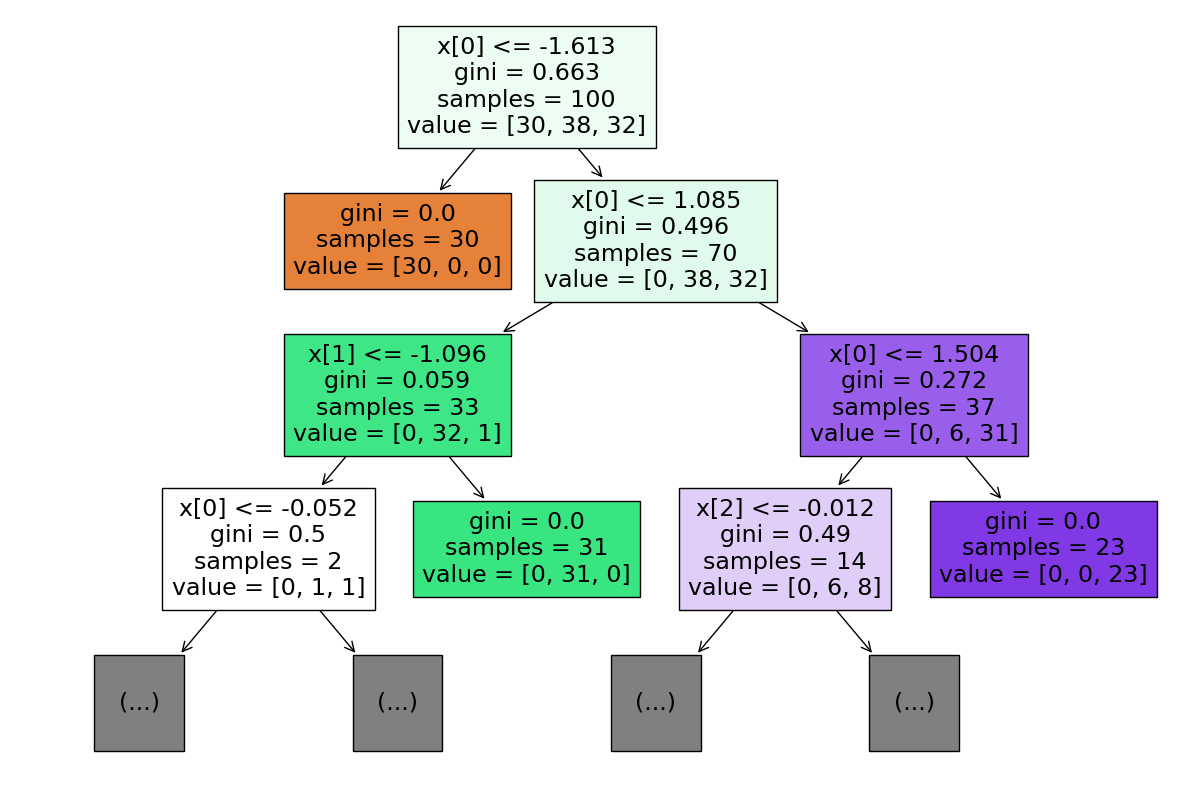

In [41]:
plt.figure(figsize = (15, 10))
tree.plot_tree(decision_tree_classifier, max_depth = 3, filled = True)

In [42]:
support_vector_classifier = SVC()
evaluate_model(x_train, x_test, y_train, y_test, support_vector_classifier, "Support Vector Classifier")

Confusion Matrix for Support Vector Classifier : 

 [[20  0  0]
 [ 0 12  0]
 [ 0  0 18]] 

Accuracy Score for Support Vector Classifier : 1.0 

Classification Report for Support Vector Classifier : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        18

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50
 



In [43]:
gaussian_nb = GaussianNB()
evaluate_model(x_train, x_test, y_train, y_test, gaussian_nb, "Gaussian Naive Bayes")

Confusion Matrix for Gaussian Naive Bayes : 

 [[20  0  0]
 [ 0 11  1]
 [ 0  3 15]] 

Accuracy Score for Gaussian Naive Bayes : 0.92 

Classification Report for Gaussian Naive Bayes : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.79      0.92      0.85        12
           2       0.94      0.83      0.88        18

    accuracy                           0.92        50
   macro avg       0.91      0.92      0.91        50
weighted avg       0.93      0.92      0.92        50
 



In [45]:
random_forest = RandomForestClassifier()
evaluate_model(x_train, x_test, y_train, y_test, random_forest, "Random Forest Classifier")

Confusion Matrix for Random Forest Classifier : 

 [[20  0  0]
 [ 0 11  1]
 [ 0  2 16]] 

Accuracy Score for Random Forest Classifier : 0.94 

Classification Report for Random Forest Classifier : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.85      0.92      0.88        12
           2       0.94      0.89      0.91        18

    accuracy                           0.94        50
   macro avg       0.93      0.94      0.93        50
weighted avg       0.94      0.94      0.94        50
 



In [46]:
adaboost_classifier = AdaBoostClassifier()
evaluate_model(x_train, x_test, y_train, y_test, adaboost_classifier, "Adaboost Classifier")

Confusion Matrix for Adaboost Classifier : 

 [[20  0  0]
 [ 0 11  1]
 [ 0  0 18]] 

Accuracy Score for Adaboost Classifier : 0.98 

Classification Report for Adaboost Classifier : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.92      0.96        12
           2       0.95      1.00      0.97        18

    accuracy                           0.98        50
   macro avg       0.98      0.97      0.98        50
weighted avg       0.98      0.98      0.98        50
 



In [47]:
gradient_boost = GradientBoostingClassifier()
evaluate_model(x_train, x_test, y_train, y_test, gradient_boost, "Gradient Boost Classifier")

Confusion Matrix for Gradient Boost Classifier : 

 [[20  0  0]
 [ 0 12  0]
 [ 0  2 16]] 

Accuracy Score for Gradient Boost Classifier : 0.96 

Classification Report for Gradient Boost Classifier : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.86      1.00      0.92        12
           2       1.00      0.89      0.94        18

    accuracy                           0.96        50
   macro avg       0.95      0.96      0.95        50
weighted avg       0.97      0.96      0.96        50
 



In [48]:
xgboost_classifier = XGBClassifier()
evaluate_model(x_train, x_test, y_train, y_test, xgboost_classifier, "Xgboost Classifier")

Confusion Matrix for Xgboost Classifier : 

 [[20  0  0]
 [ 0 11  1]
 [ 0  2 16]] 

Accuracy Score for Xgboost Classifier : 0.94 

Classification Report for Xgboost Classifier : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.85      0.92      0.88        12
           2       0.94      0.89      0.91        18

    accuracy                           0.94        50
   macro avg       0.93      0.94      0.93        50
weighted avg       0.94      0.94      0.94        50
 

